In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


### Letter recognition using SVM
#### Let's now tackle a slightly more complex problem - letter recognition. We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters



### Data understanding

In [33]:
# Loading libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# dataset
digits_1 = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [34]:
digits = digits_1[:20000]

In [35]:
# about the dataset

# dimensions
print("Dimensions: ", digits.shape, "\n")

# data types
print(digits.info())

# head
digits.head()

Dimensions:  (20000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 119.8 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
print(digits.columns)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [37]:
order = list(np.sort(digits['label'].unique()))
print(order)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [38]:
letter_means = digits.groupby('label').mean()
letter_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


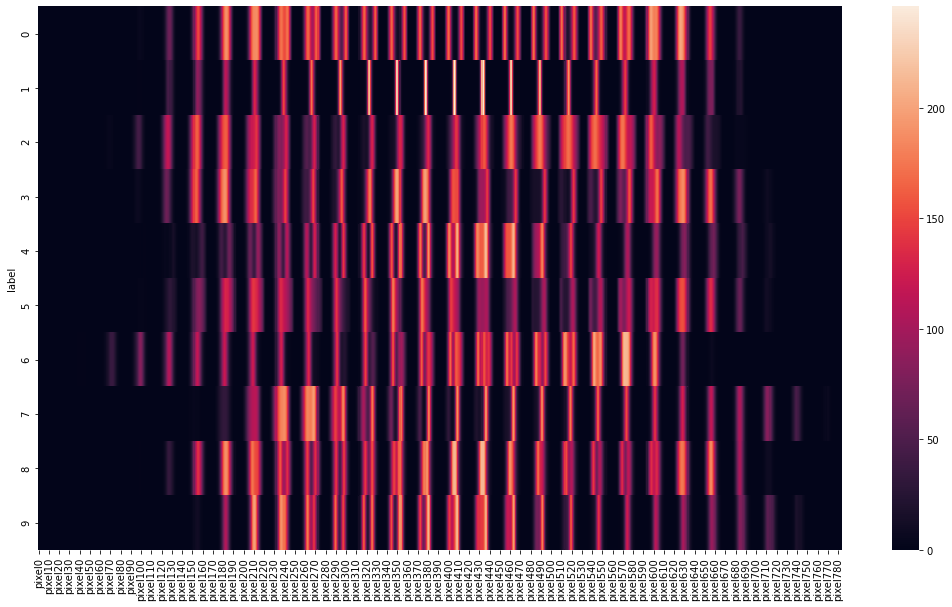

In [39]:
plt.figure(figsize=(18, 10))
sns.heatmap(letter_means)

#### Data Preparation

In [40]:
# average feature values
round(digits.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [43]:
# splitting into X and y
X = digits.drop("label", axis = 1)
y = digits['label']

In [44]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

### Model Building

In [45]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [46]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9156666666666666 

[[553   0   2   0   1   6   3   0   2   0]
 [  0 684   3   1   2   1   1   0   7   1]
 [  8   4 549  10  10   2   7   3   8   1]
 [  0   2  15 568   1  26   3   0  15   3]
 [  1   1   6   0 554   2   7   2   3  17]
 [  6   3   4  28   5 448   8   1  11   8]
 [  7   0  11   1   7   6 544   0   2   0]
 [  2   5  16   6   7   2   0 563   0  29]
 [  3   3  11  26   3  20   4   1 498   4]
 [  3   2   5   4  22   5   0  21   7 533]]


#### Linear SVM is giving us an accuracy of 92%

In [47]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [48]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9478333333333333 

[[549   0   6   1   1   4   5   0   1   0]
 [  0 684   8   0   1   0   2   0   4   1]
 [  5   2 579   3   3   0   2   2   6   0]
 [  0   0  19 579   1  12   2   5  12   3]
 [  0   1   6   0 567   1   3   4   2   9]
 [  0   1   8   9   1 490   7   1   3   2]
 [  7   0   8   0   2   3 556   0   2   0]
 [  1   5  18   1   4   0   0 589   0  12]
 [  3   2   5   3   0  10   1   4 541   4]
 [  1   2  11   6  12   1   0  14   2 553]]


#### The non-linear model gives approx. 95% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models

### Grid Search: Hyperparameter Tuning
#### Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation

In [49]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 189.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [50]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,212.759885,1.912356,30.370820,0.332424,1,0.01,"{'C': 1, 'gamma': 0.01}",0.787143,0.778214,0.779286,...,0.774786,0.009635,12,0.999732,0.999732,0.999732,0.999732,0.999732,0.999732,0.000000
1,44.326003,0.473886,14.779813,0.172892,1,0.001,"{'C': 1, 'gamma': 0.001}",0.937500,0.940357,0.934643,...,0.938143,0.002050,4,0.973839,0.973571,0.974196,0.974375,0.975000,0.974196,0.000489
2,63.636193,0.161095,21.231011,0.112440,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.912857,0.913571,0.910714,...,0.912357,0.001558,8,0.925268,0.923839,0.924464,0.924911,0.923929,0.924482,0.000552
3,207.581880,4.534098,28.873780,0.389298,10,0.01,"{'C': 10, 'gamma': 0.01}",0.800357,0.790000,0.795000,...,0.788571,0.009718,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,35.665693,0.283093,12.529877,0.205934,10,0.001,"{'C': 10, 'gamma': 0.001}",0.948929,0.954286,0.949286,...,0.950071,0.002509,1,0.998571,0.998571,0.999018,0.998571,0.998661,0.998679,0.000173
5,27.979281,0.132579,11.929544,0.081312,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.932857,0.933929,0.928571,...,0.930929,0.002611,6,0.958393,0.959375,0.960357,0.959732,0.959821,0.959536,0.000652
6,214.536257,2.192931,30.011897,0.198605,100,0.01,"{'C': 100, 'gamma': 0.01}",0.800357,0.790000,0.795000,...,0.788571,0.009718,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,37.745608,0.298679,13.285055,0.204129,100,0.001,"{'C': 100, 'gamma': 0.001}",0.949643,0.951071,0.949286,...,0.949286,0.001083,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,21.991229,0.328696,10.045087,0.156805,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.935357,0.933214,0.928929,...,0.932143,0.002259,5,0.991339,0.990179,0.992500,0.991696,0.991964,0.991536,0.000777
9,215.458739,2.091054,30.398675,0.185273,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.800357,0.790000,0.795000,...,0.788571,0.009718,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


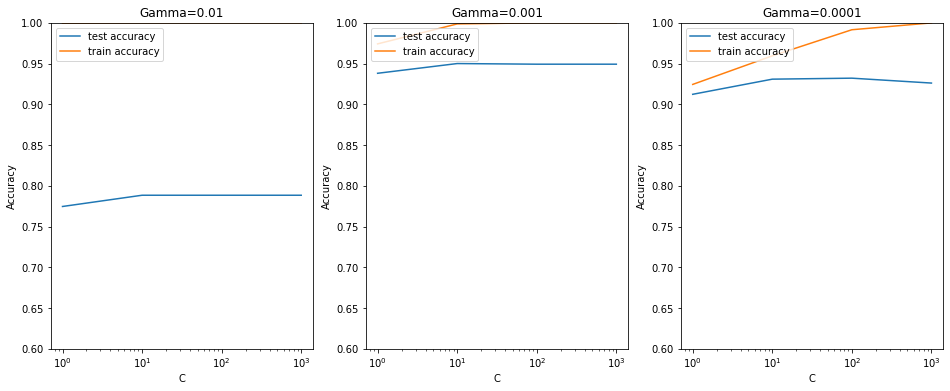

In [51]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [52]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9500714285714287 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=5, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")
